在实验练习08中我们使用的数据为两个城市在不同因素影响下某小时共享单车租用的数量。现在我们利用该数据集构建一个回归预测模型，根据数据中的某些属性预测该时段内的单车租用数量，该表所有值均为整型数据，表结构为：

id 记录编号，无其他意义

city 城市代号，0为北京，1为上海

hour 小时，代表时间

is_workday 是否为工作日，0为否，1为是

temp_air 大气温度，单位为摄氏度

temp_body 体感温度，单位为摄氏度

weather 天气代号，1为晴天，2为多云或阴天，3为雨天或雪天

wind 风级，数值越大代表风速越大

y 该小时内共享单车被租用的数量

请完成以下任务

In [5]:
#数据集已上传至data文件夹中，具体文件为bike.csv。请使用pandas库读取该文件
import pandas as pd

file_path = r"D:\bike.csv"

data = pd.read_csv(file_path)

# 查看前几行数据
print(data.head())


   id  city  hour  is_workday  weather  temp_air  temp_body  wind   y
0   1     0    22           1        2       3.0        0.7     0  15
1   2     0    10           1        1      21.0       24.9     3  48
2   3     0     0           1        1      25.3       27.4     0  21
3   4     0     7           0        1      15.7       16.2     0  11
4   5     1    10           1        1      21.1       25.0     2  39


In [6]:
# 删除 'id' 列
data = data.drop(columns=['id'])

# 查看前几行数据，确认删除成功
print(data.head())


   city  hour  is_workday  weather  temp_air  temp_body  wind   y
0     0    22           1        2       3.0        0.7     0  15
1     0    10           1        1      21.0       24.9     3  48
2     0     0           1        1      25.3       27.4     0  21
3     0     7           0        1      15.7       16.2     0  11
4     1    10           1        1      21.1       25.0     2  39


In [8]:
# 筛选出上海市的数据（city == 1）
shanghai_data = data[data['city'] == 1]

# 删除 city 列
shanghai_data = shanghai_data.drop(columns=['city'])

# 查看处理后的数据
print(shanghai_data.head())


    hour  is_workday  weather  temp_air  temp_body  wind   y
4     10           1        1      21.1       25.0     2  39
5      0           1        1      20.4       18.2     0  12
9      4           1        3      17.4       18.0     3   2
10     0           1        1      14.9       15.3     2   6
11     8           0        1      25.0       28.1     0  25


In [9]:
#为简化数据，请将hour列中原来6点-18点统一为1；19点-次日5点统一为0
# 将 hour 列重新编码
shanghai_data['hour'] = shanghai_data['hour'].apply(lambda x: 1 if 6 <= x <= 18 else 0)

# 处理后的数据
print(shanghai_data.head())


    hour  is_workday  weather  temp_air  temp_body  wind   y
4      1           1        1      21.1       25.0     2  39
5      0           1        1      20.4       18.2     0  12
9      0           1        3      17.4       18.0     3   2
10     0           1        1      14.9       15.3     2   6
11     1           0        1      25.0       28.1     0  25


In [10]:
import numpy as np

# 提取 y 列为目标变量并转换为 NumPy 列向量
y = shanghai_data['y'].values.reshape(-1, 1)

# 从原数据中删除 y 列
shanghai_data = shanghai_data.drop(columns=['y'])

# 查看结果
print("y 列向量：\n", y[:5])  # 显示 y 的前 5 行
print("\n处理后的数据：\n", shanghai_data.head())


y 列向量：
 [[39]
 [12]
 [ 2]
 [ 6]
 [25]]

处理后的数据：
     hour  is_workday  weather  temp_air  temp_body  wind
4      1           1        1      21.1       25.0     2
5      0           1        1      20.4       18.2     0
9      0           1        3      17.4       18.0     3
10     0           1        1      14.9       15.3     2
11     1           0        1      25.0       28.1     0


In [11]:
# 将 DataFrame 转换为 NumPy 数组
X = shanghai_data.values

# 查看转换后的结果
print("转换后的 NumPy 数组：\n", X[:5])  # 显示前 5 行


转换后的 NumPy 数组：
 [[ 1.   1.   1.  21.1 25.   2. ]
 [ 0.   1.   1.  20.4 18.2  0. ]
 [ 0.   1.   3.  17.4 18.   3. ]
 [ 0.   1.   1.  14.9 15.3  2. ]
 [ 1.   0.   1.  25.  28.1  0. ]]


In [12]:
#训练集与测试集8:2的比例将原始数据集划分
# 将 DataFrame 转换为 NumPy 数组
X = shanghai_data.values

# 查看转换后的结果
print("转换后的 NumPy 数组：\n", X[:5])  # 显示前 5 行


转换后的 NumPy 数组：
 [[ 1.   1.   1.  21.1 25.   2. ]
 [ 0.   1.   1.  20.4 18.2  0. ]
 [ 0.   1.   3.  17.4 18.   3. ]
 [ 0.   1.   1.  14.9 15.3  2. ]
 [ 1.   0.   1.  25.  28.1  0. ]]


In [14]:
#先构建一个线性回归模型（多元一次函数），然后利用训练集训练模型
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 假设 X 和 y 已经定义好
# X 是特征数据，y 是目标标签

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# 对训练集数据进行归一化
X_train_scaled = scaler_X.fit_transform(X_train)

# 对测试集数据进行归一化（使用训练集的参数）
X_test_scaled = scaler_X.transform(X_test)

# 对训练集标签进行归一化
y_train_scaled = scaler_y.fit_transform(y_train)

# 对测试集标签进行归一化（使用训练集标签的参数）
y_test_scaled = scaler_y.transform(y_test)

# 查看归一化后的数据
print("归一化后的训练集特征：\n", X_train_scaled[:5])
print("\n归一化后的训练集标签：\n", y_train_scaled[:5])


归一化后的训练集特征：
 [[1.         1.         0.         0.66063348 0.65224359 0.42857143]
 [1.         1.         0.         0.18778281 0.21634615 0.14285714]
 [1.         1.         0.         0.760181   0.71153846 0.14285714]
 [0.         0.         0.         0.47963801 0.48397436 0.28571429]
 [1.         1.         0.         0.40723982 0.42948718 0.42857143]]

归一化后的训练集标签：
 [[0.56544503]
 [0.11518325]
 [0.31413613]
 [0.08900524]
 [0.16230366]]


In [15]:
#利用测试集对训练好的模型进行评估
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 测试数据 X_test_scaled 和 y_test_scaled

# 初始化并训练一个线性回归模型
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# 使用训练好的模型对测试集进行预测
y_pred = model.predict(X_test_scaled)

# 计算模型的评估指标
# 1. 均方误差 (MSE)
mse = mean_squared_error(y_test_scaled, y_pred)
# 2. 决定系数 (R²)
r2 = r2_score(y_test_scaled, y_pred)

# 打印评估结果
print("均方误差 (MSE):", mse)
print("决定系数 (R²):", r2)


均方误差 (MSE): 0.027317476037817062
决定系数 (R²): 0.37183953173606454


In [16]:
#模型评估：用均方根误差（RMSE）作为评估指标，并输出RMSE值
import numpy as np
from sklearn.metrics import mean_squared_error

# 计算均方误差 (MSE)
mse = mean_squared_error(y_test_scaled, y_pred)

# 计算均方根误差 (RMSE)
rmse = np.sqrt(mse)

# 输出 RMSE
print("均方根误差 (RMSE):", rmse)


均方根误差 (RMSE): 0.16527999285399628


利用K近邻算法学习鸢尾花数据集
K近邻（K-Nearest Neighbors，简称KNN）算法是一种基本的分类和回归方法，也是监督学习中最简单、直观的方法之一。

该算法基于一个简单的思想：如果一个样本在特征空间中的k个最近邻居中的大多数属于某个类别，则该样本也属于这个类别。

利用鸢尾花数据集进行实验，鸢尾花数据集可以通过sklearn库导入

In [17]:
#加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# 1. 导入鸢尾花数据集
iris = datasets.load_iris()
X = iris.data  # 特征数据
y = iris.target  # 目标标签

# 2. 80%的数据作为训练集，20%作为测试集，设置随机种子为42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印数据集的形状，确保数据已正确拆分
print("训练集特征的形状:", X_train.shape)
print("测试集特征的形状:", X_test.shape)
print("训练集标签的形状:", y_train.shape)
print("测试集标签的形状:", y_test.shape)


训练集特征的形状: (120, 4)
测试集特征的形状: (30, 4)
训练集标签的形状: (120,)
测试集标签的形状: (30,)


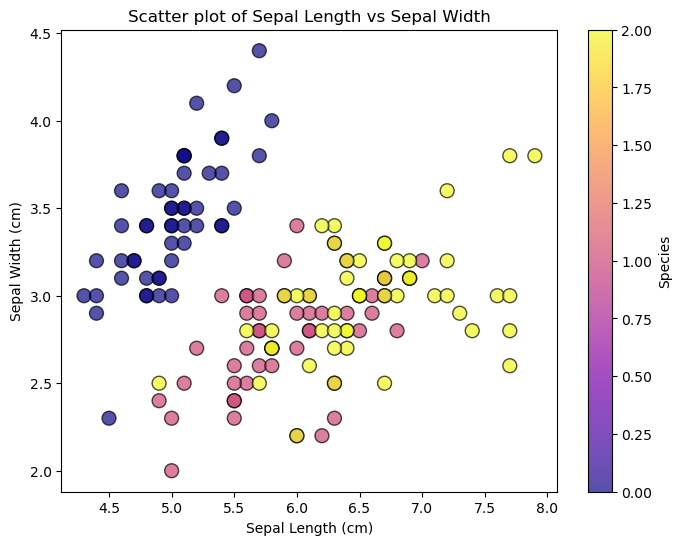

In [19]:
#以花萼长度为横轴，花萼长度为纵轴绘制数据的散点图
import matplotlib.pyplot as plt
from sklearn import datasets

# 1. 导入鸢尾花数据集
iris = datasets.load_iris()
X = iris.data  # 特征数据
y = iris.target  # 目标标签

# 2. 获取花萼长度和花萼宽度
sepal_length = X[:, 0]  # 花萼长度 (第1列)
sepal_width = X[:, 1]   # 花萼宽度 (第2列)

# 3. 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(sepal_length, sepal_width, c=y, cmap='plasma', edgecolor='k', s=100, alpha=0.7)

# 4. 添加图表标题和坐标轴标签
plt.title("Scatter plot of Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

# 5. 显示颜色条
plt.colorbar(label='Species')

# 6. 显示图形
plt.show()


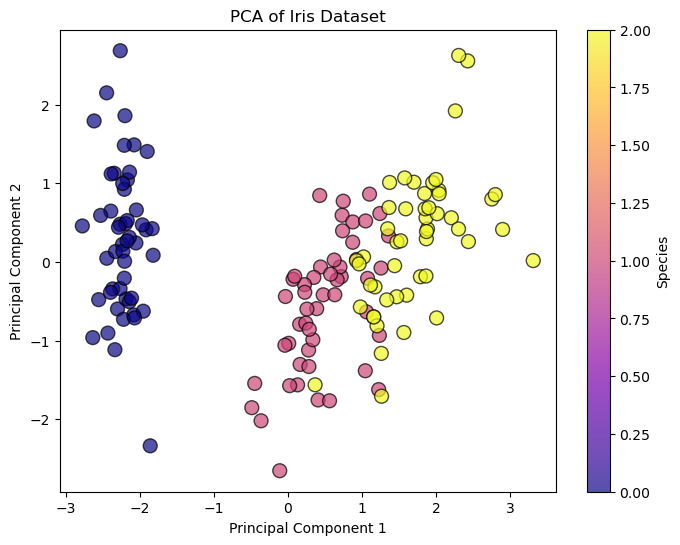

In [20]:
#对鸢尾花数据的特征进行PCA降维，并且可视化降维后的结果，x轴为主成分1，y轴为主成分2
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 导入鸢尾花数据集
iris = datasets.load_iris()
X = iris.data  # 特征数据
y = iris.target  # 目标标签

# 2. 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 使用PCA进行降维，降到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. 可视化降维后的结果，X轴为主成分1，Y轴为主成分2
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', edgecolor='k', s=100, alpha=0.7)
plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Species')
plt.show()


Accuracy of KNN with K=3 on the test set: 93.33%


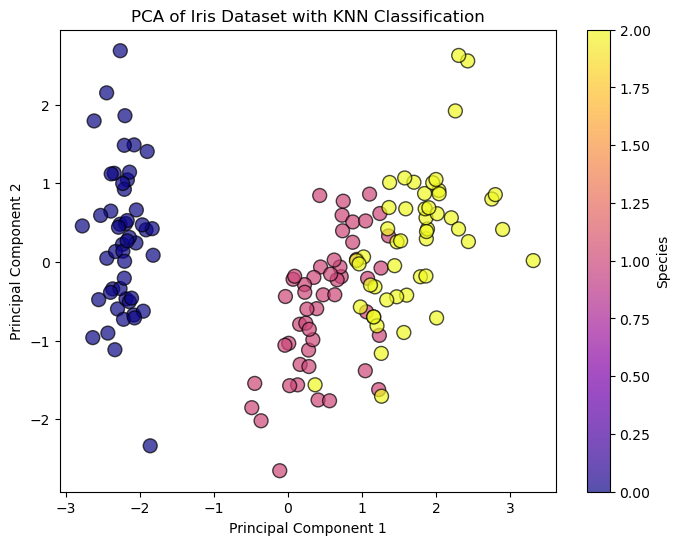

In [23]:
#以K=3训练分类器
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. 导入鸢尾花数据集
iris = datasets.load_iris()
X = iris.data  # 特征数据
y = iris.target  # 目标标签

# 2. 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 使用PCA进行降维，降到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. 划分训练集和测试集，训练集比例为80%，测试集比例为20%，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 5. 使用K近邻算法，设置K=3进行分类训练
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 6. 在测试集上进行预测
y_pred = knn.predict(X_test)

# 7. 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN with K=3 on the test set: {accuracy * 100:.2f}%")

# 8. 可视化降维后的结果，X轴为主成分1，Y轴为主成分2
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', edgecolor='k', s=100, alpha=0.7)
plt.title("PCA of Iris Dataset with KNN Classification")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Species')
plt.show()


In [24]:
#在测试集上进行测试，最后输出分类准确率
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. 导入鸢尾花数据集
iris = datasets.load_iris()
X = iris.data  # 特征数据
y = iris.target  # 目标标签

# 2. 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 使用PCA进行降维，降到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. 划分训练集和测试集，训练集比例为80%，测试集比例为20%，随机种子42
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 5. 使用K近邻算法，设置K=3进行分类训练
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 6. 在测试集上进行预测
y_pred = knn.predict(X_test)

# 7. 计算分类准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN with K=3 on the test set: {accuracy * 100:.2f}%")


Accuracy of KNN with K=3 on the test set: 93.33%
